In [1]:
pip install networkx matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Enter number of vertices:  5
Enter number of edges:  8


Enter edges (e.g., 0 1 for an edge between vertex 0 and 1):


 0 1
 0 2
 1 2
 1 3
 2 4
 3 2
 3 4
 3 0


3 colors are not enough, using 4 colors now...


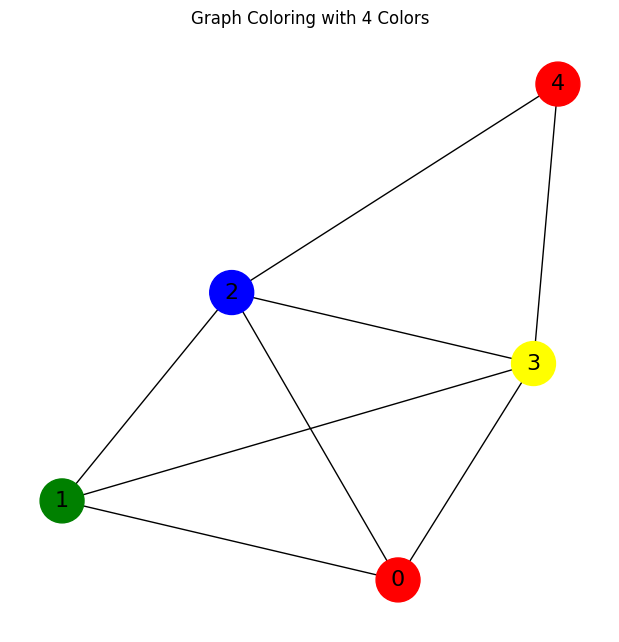

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to check if color assignment is valid
def is_safe(node, color, graph, colors):
    for neighbor in graph.neighbors(node):
        if neighbor in colors and colors[neighbor] == color:
            return False
    return True

# Backtracking function for graph coloring
def graph_coloring(graph, num_colors, colors, node=0):
    nodes = list(graph.nodes)
    if node == len(nodes):  # All nodes are assigned a color
        return True

    for color in range(1, num_colors + 1):
        if is_safe(nodes[node], color, graph, colors):
            colors[nodes[node]] = color  # Assign color
            if graph_coloring(graph, num_colors, colors, node + 1):
                return True  # If successful, return
            del colors[nodes[node]]  # Backtrack
    return False  # No valid color found
# Function to visualize the graph
def draw_graph(graph, colors, title):
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(graph)
    color_map = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow'}  # Color legend
    node_colors = [color_map[colors[node]] for node in graph.nodes()]
    
    nx.draw(graph, pos, with_labels=True, node_color=node_colors,
            edge_color="black", node_size=1000, font_size=16)
    plt.title(title)
    plt.show()
# Main function
def main():
    num_vertices = int(input("Enter number of vertices: "))
    num_edges = int(input("Enter number of edges: "))
    
    graph = nx.Graph()
    graph.add_nodes_from(range(num_vertices))
    
    print("Enter edges (e.g., 0 1 for an edge between vertex 0 and 1):")
    for _ in range(num_edges):
        u, v = map(int, input().split())
        graph.add_edge(u, v)
    
    colors = {}

    # Try with 3 colors
    if graph_coloring(graph, 3, colors):
        print("Graph colored successfully using 3 colors.")
        draw_graph(graph, colors, "Graph Coloring with 3 Colors")
    else:
        print("3 colors are not enough, using 4 colors now...")
        colors.clear()
        graph_coloring(graph, 4, colors)
        draw_graph(graph, colors, "Graph Coloring with 4 Colors")
# Run the program
if __name__ == "__main__":
    main()
